In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from citipy import citipy
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf514395b8521d498c5fd09fe9b5b3ab


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf514395b8521d498c5fd09fe9b5b3ab&q=Boston


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 13 | toucheng
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 13 | thompson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 13 | khatanga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 13 | golden
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 13 | butaritari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 13 | mataura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 13 | hammerfest
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 13 | vaini
-----------------------------
Data Retrieval

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 14 | kaitangata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 14 | port elizabeth
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 14 | itaituba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 14 | barentsburg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 14 | gat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 14 | bindura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 14 | ribeira grande
-----------------------------
Data Re

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 15 | bargal
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 15 | urusha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 15 | chauk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 15 | nanortalik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 15 | fairbanks
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 15 | quatre cocos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 15 | coihaique
-----------------------------
Data Retrieval Co

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 16 | leshukonskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 16 | belaya gora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 16 | kruisfontein
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 16 | qusar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 16 | fortuna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 16 | doha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 16 | lalibela
-----------------------------
Data Retrieval

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 17 | pingzhuang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 17 | mys shmidta
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 17 | agadez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 17 | griffith
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 18 | arlit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 18 | sukumo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 18 | ojinaga
-----------------------------
Data Retrieval Complete 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 19 | terney
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 19 | troitsko-pechorsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 19 | jackson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 19 | taltal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 19 | penzance
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 19 | itoman
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 19 | plettenberg bay
-----------------------------
Data Retrieval Complete      
---------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 20 | keningau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 20 | lata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 20 | pevek
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 20 | kutum
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 20 | wukari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 20 | roald
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 20 | batouri
-----------------------------
Data Retrieval Complete      
-----------------------------
Pr

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 21 | mount isa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 21 | conde
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 21 | wanaka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 21 | mangrol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 21 | nome
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 21 | baiyin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 21 | tanshui
City not found. Skipping...
-----------------------------
Data Retrieval Complete      


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 22 | taoudenni
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 22 | dolbeau
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 22 | chalchihuites
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 22 | salo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 22 | yatou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 22 | halifax
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 22 | cedral
-----------------------------
Data Retrieval Complete

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 24 | havoysund
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 24 | meulaboh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 24 | khorinsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 24 | bubaque
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 24 | kenai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 24 | keetmanshoop
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 24 | cabedelo
-----------------------------
Data Retrieval Complete      
--------------------

In [11]:
city_data

[{'City': 'Toucheng',
  'Lat': 24.86,
  'Lng': 121.82,
  'Max Temp': 68,
  'Humidity': 99,
  'Cloudiness': 6,
  'Wind Speed': 11.21,
  'Country': 'TW',
  'Date': '2020-04-17 19:25:49'},
 {'City': 'Thompson',
  'Lat': 55.74,
  'Lng': -97.86,
  'Max Temp': 41,
  'Humidity': 44,
  'Cloudiness': 90,
  'Wind Speed': 13.87,
  'Country': 'CA',
  'Date': '2020-04-17 19:22:03'},
 {'City': 'Khatanga',
  'Lat': 71.97,
  'Lng': 102.5,
  'Max Temp': 7.25,
  'Humidity': 90,
  'Cloudiness': 0,
  'Wind Speed': 13.06,
  'Country': 'RU',
  'Date': '2020-04-17 19:25:50'},
 {'City': 'Golden',
  'Lat': 39.76,
  'Lng': -105.22,
  'Max Temp': 46,
  'Humidity': 51,
  'Cloudiness': 5,
  'Wind Speed': 8.05,
  'Country': 'US',
  'Date': '2020-04-17 19:25:26'},
 {'City': 'Butaritari',
  'Lat': 3.07,
  'Lng': 172.79,
  'Max Temp': 82.4,
  'Humidity': 80,
  'Cloudiness': 89,
  'Wind Speed': 15.9,
  'Country': 'KI',
  'Date': '2020-04-17 19:25:51'},
 {'City': 'Mataura',
  'Lat': -46.19,
  'Lng': 168.86,
  'Max Temp'

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Toucheng,24.86,121.82,68.00,99,6,11.21,TW,2020-04-17 19:25:49
1,Thompson,55.74,-97.86,41.00,44,90,13.87,CA,2020-04-17 19:22:03
2,Khatanga,71.97,102.50,7.25,90,0,13.06,RU,2020-04-17 19:25:50
3,Golden,39.76,-105.22,46.00,51,5,8.05,US,2020-04-17 19:25:26
4,Butaritari,3.07,172.79,82.40,80,89,15.90,KI,2020-04-17 19:25:51
5,Mataura,-46.19,168.86,50.00,91,100,7.00,NZ,2020-04-17 19:25:49
6,Hammerfest,70.66,23.68,37.40,84,75,29.97,NO,2020-04-17 19:25:51
7,Vaini,-21.20,-175.20,75.20,83,20,6.93,TO,2020-04-17 19:25:51
8,Dikson,73.51,80.55,7.57,90,2,5.06,RU,2020-04-17 19:25:51
9,Touros,-5.20,-35.46,84.20,74,40,11.41,BR,2020-04-17 19:25:52


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
today = time.time()
today

1587151731.585751

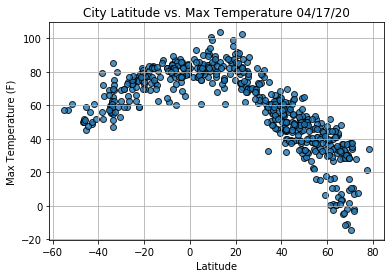

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

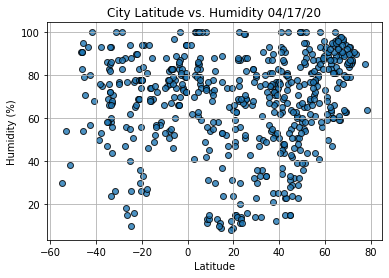

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

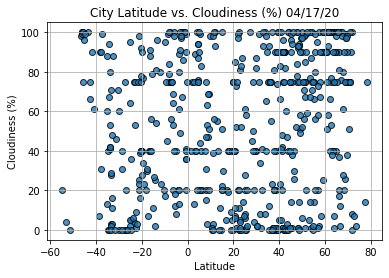

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

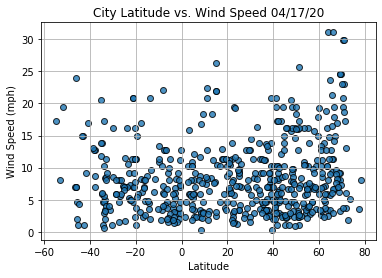

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Toucheng,24.86,121.82,68.00,99,6,11.21,TW,2020-04-17 19:25:49
1,Thompson,55.74,-97.86,41.00,44,90,13.87,CA,2020-04-17 19:22:03
2,Khatanga,71.97,102.50,7.25,90,0,13.06,RU,2020-04-17 19:25:50
3,Golden,39.76,-105.22,46.00,51,5,8.05,US,2020-04-17 19:25:26
4,Butaritari,3.07,172.79,82.40,80,89,15.90,KI,2020-04-17 19:25:51
...,...,...,...,...,...,...,...,...,...
553,Hede,33.77,120.25,50.31,76,8,6.46,CN,2020-04-17 19:28:50
554,Sept-Iles,50.20,-66.38,33.01,36,75,19.46,CA,2020-04-17 19:28:50
555,Ornskoldsvik,63.29,18.72,41.00,47,38,12.75,SE,2020-04-17 19:28:50
556,Ibra,22.69,58.53,82.40,30,1,1.32,OM,2020-04-17 19:28:51


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

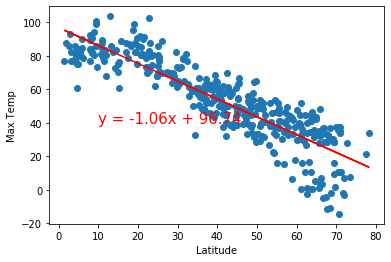

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

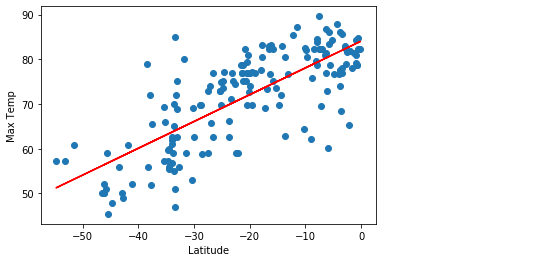

In [24]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

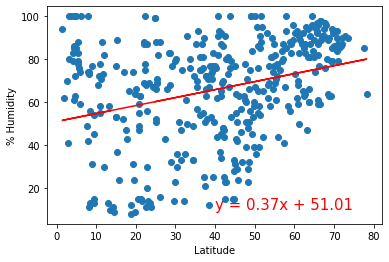

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

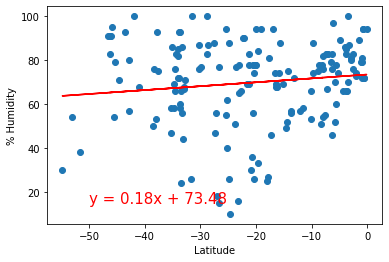

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [27]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [28]:
r_value

0.12593176877440246

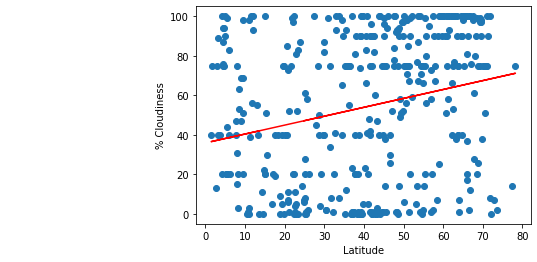

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.24351651176967265

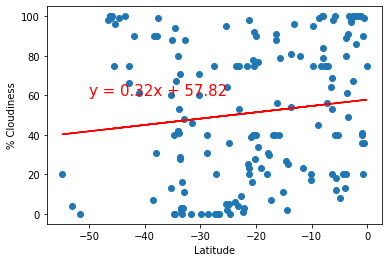

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [32]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.12831212109955095

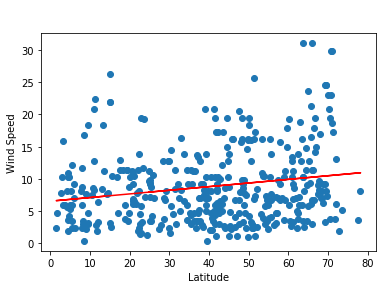

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

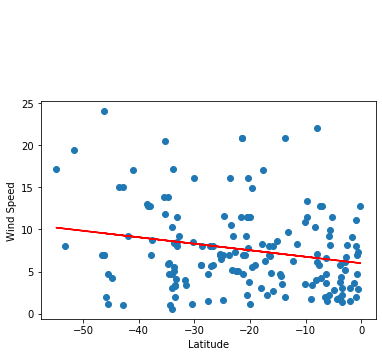

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))